In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw
import seaborn as sns 
import pandas as pd
import sys
sns.set_style('ticks')

In [2]:
sys.path.append('..')

In [3]:
def cases(beta,gamma,eps,I0):
    R0 = beta/gamma 
    alpha = (1/R0) + eps + I0
    beta2 = np.log((1/R0) + eps)
    gamma = R0
    C = (1/gamma)*(lambertw(-gamma*np.exp(beta2 - alpha*gamma)) + (alpha*gamma))
    return np.real(C)

# Example - First simulations $\epsilon = 0.03$

In [4]:
fsize_eps1 = []
std_fsize_eps1 = []
ftime_eps1 = []
std_ftime_eps1 = []

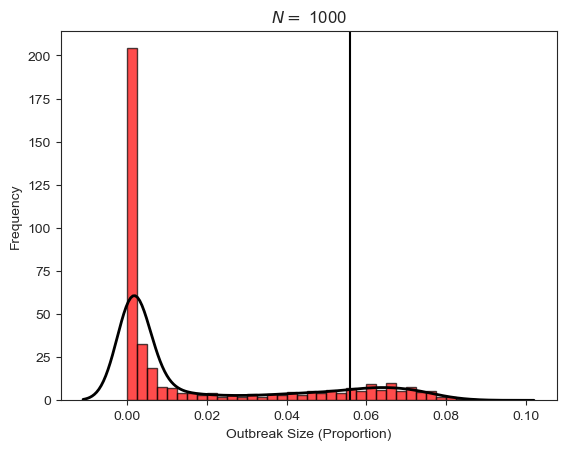

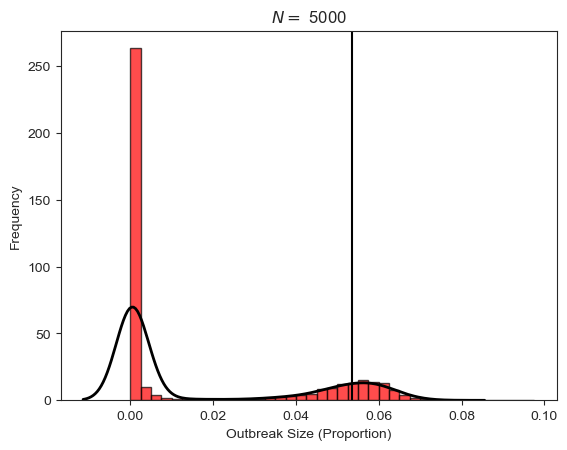

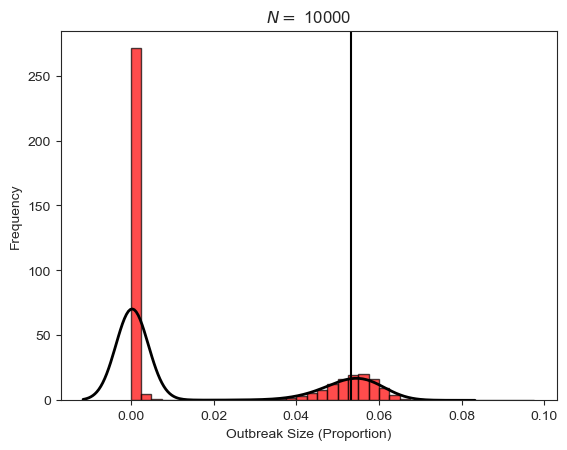

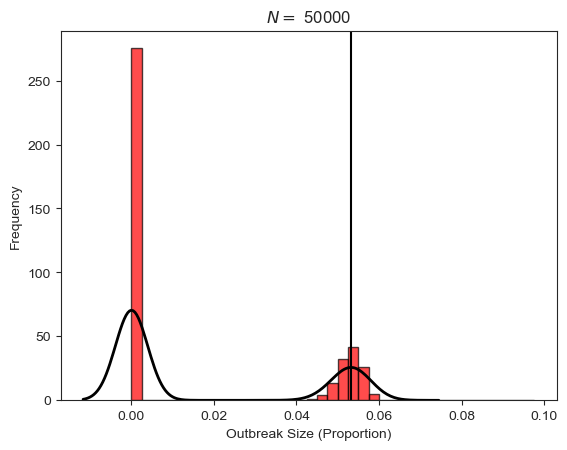

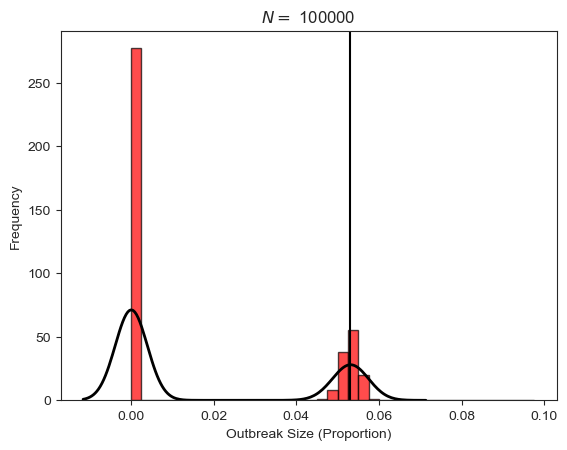

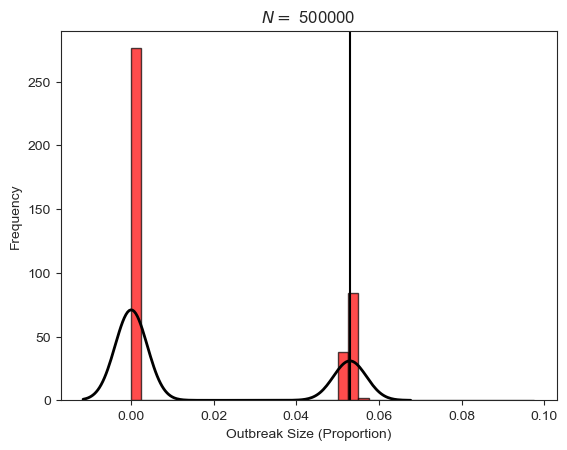

In [5]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for i in range(len(N_vec)):
    fsize_eps1.append(np.mean(df[i]/N_vec[i]))
    std_fsize_eps1.append(np.std(df[i]/N_vec[i]))
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    sns.kdeplot(np.array(df[i])/N_vec[i], color = 'black', linewidth = 2)
    plt.hist(np.array(df[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red', density = True, alpha = 0.7)
    #sns.displot(np.array(df[i])/N_vec[i], bins = 100)
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.axvline(cases(3,0.2,0.03,1/N_vec[i]), color = 'k', label = 'deterministic')
    plt.show()

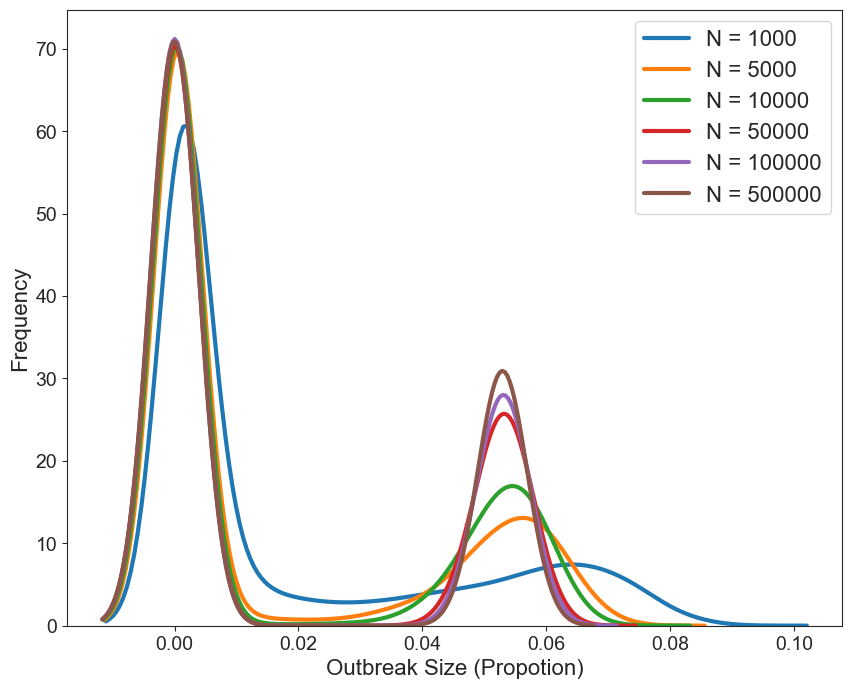

In [6]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
fig = plt.figure(figsize = (10,8))
for i in range(len(N_vec)):
    fsize_eps1.append(np.mean(df[i]/N_vec[i]))
    std_fsize_eps1.append(np.std(df[i]/N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    sns.kdeplot(np.array(df[i])/N_vec[i], linewidth = 3, label = 'N = '+str(N_vec[i]))
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Outbreak Size (Propotion)', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

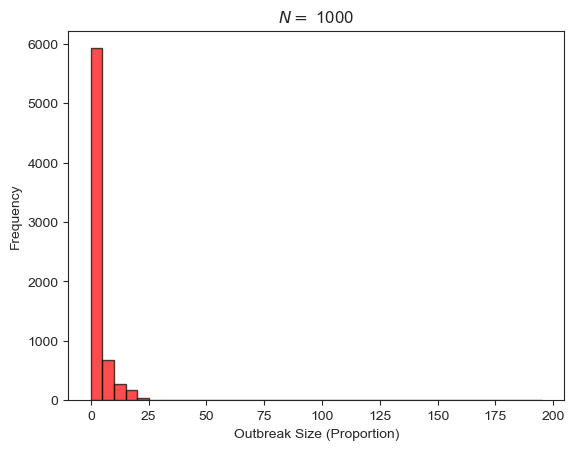

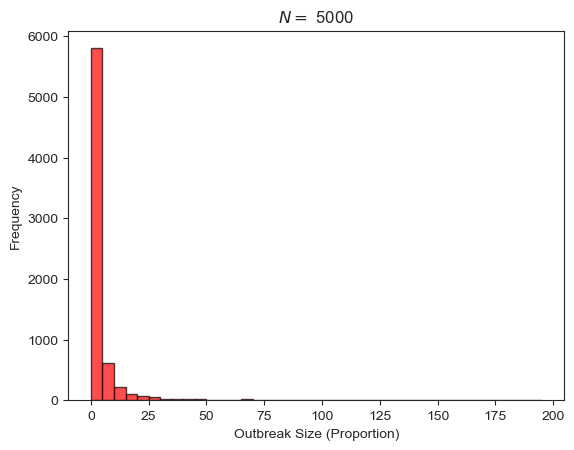

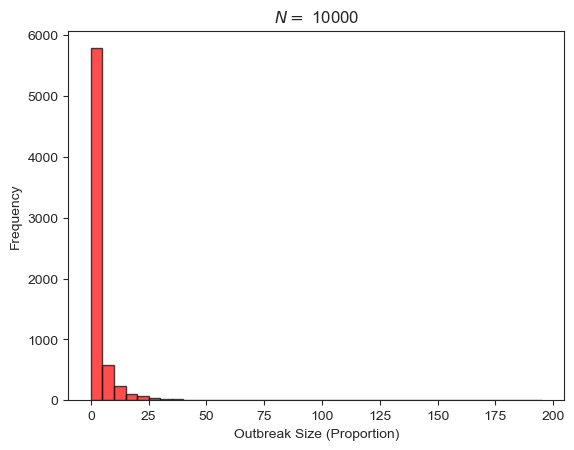

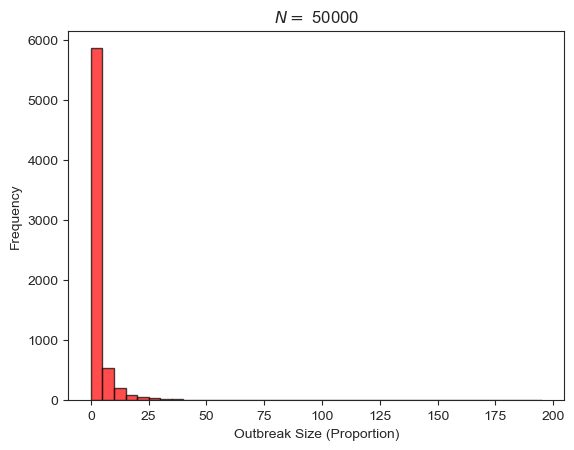

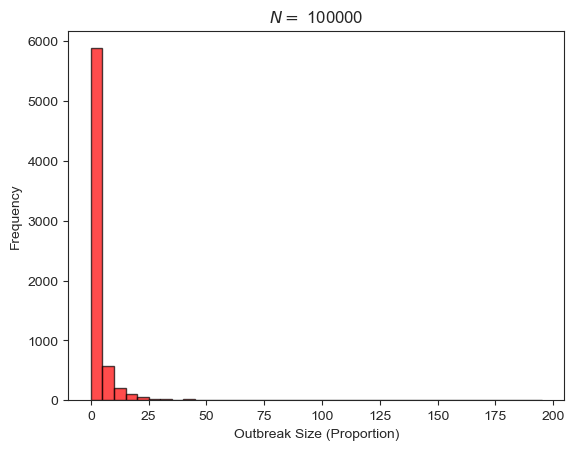

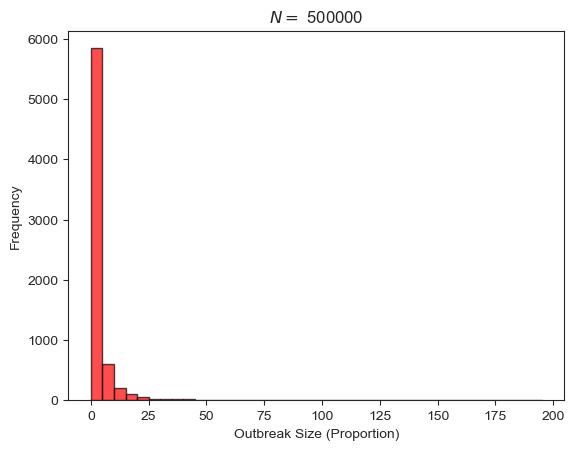

In [7]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    fsize_eps1.append(np.mean(df_cur))
    std_fsize_eps1.append(np.std(df_cur))
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,200,5)
    plt.hist(np.array(df_cur), bins = bins_vec, edgecolor = 'black', color = 'red', alpha = 0.7)
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.show()

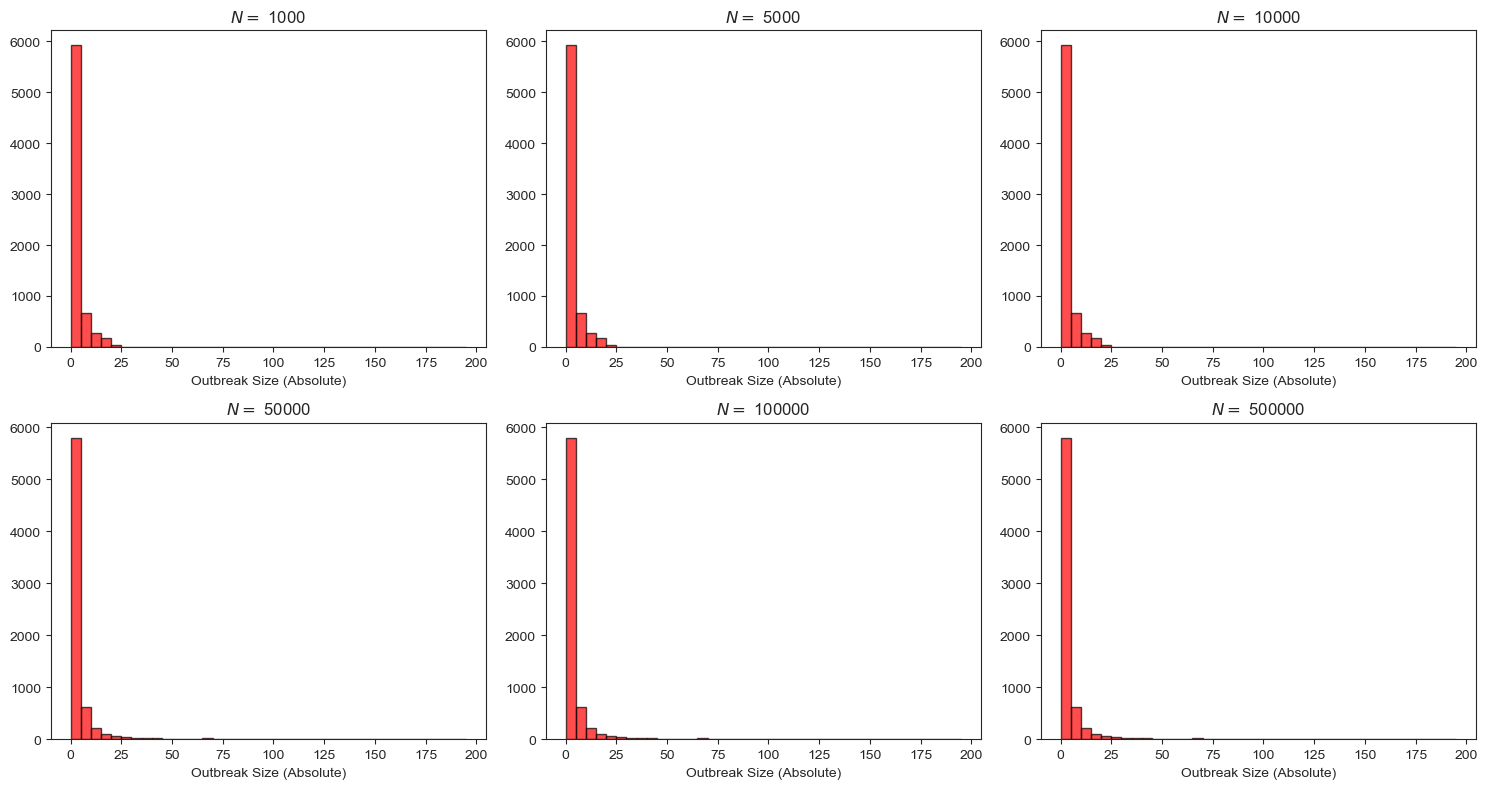

In [8]:
fig, axs = plt.subplots(2, 3, figsize = (15,8))
df = np.loadtxt(files[-1])
c = 0
for i in range(2):
    for j in range(3):
        df_cur = df[i]
        df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
        bins_vec = np.arange(0,200,5)
        axs[i,j].hist(np.array(df_cur), bins = bins_vec, edgecolor = 'black', color = 'red', alpha = 0.7)
        #axs[i,j].legend(fontsize = 8)
        axs[i,j].set_xlabel('Outbreak Size (Absolute)')
        axs[i,j].set_title(r'$N = $ '+str(N_vec[c]))
        c = c + 1
fig.tight_layout()
plt.show()

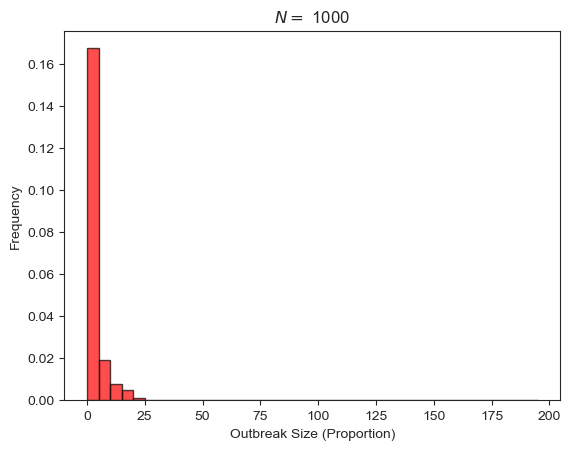

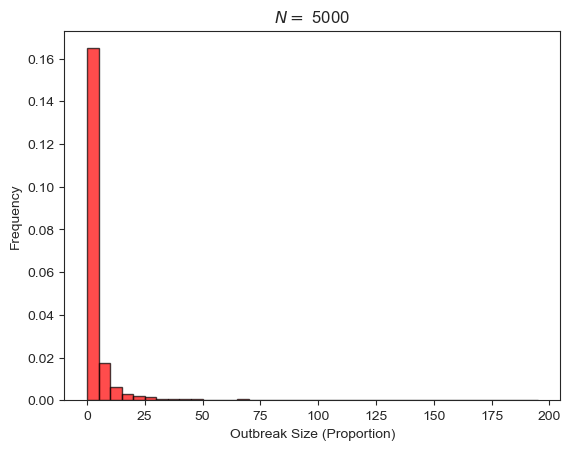

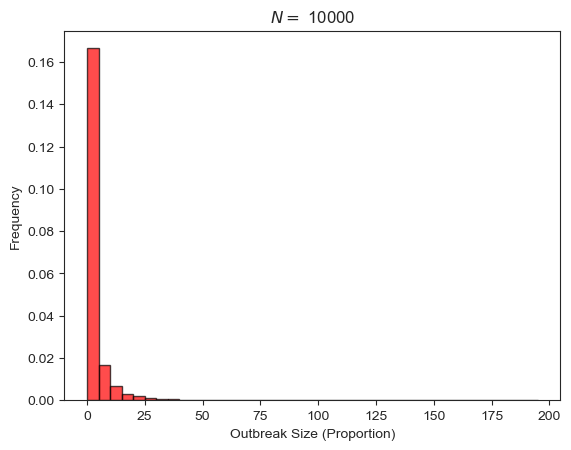

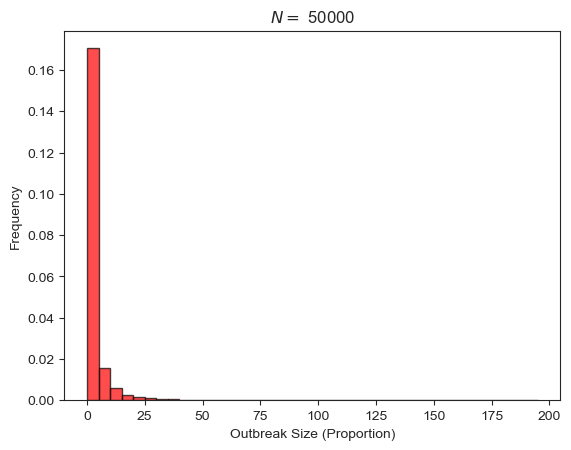

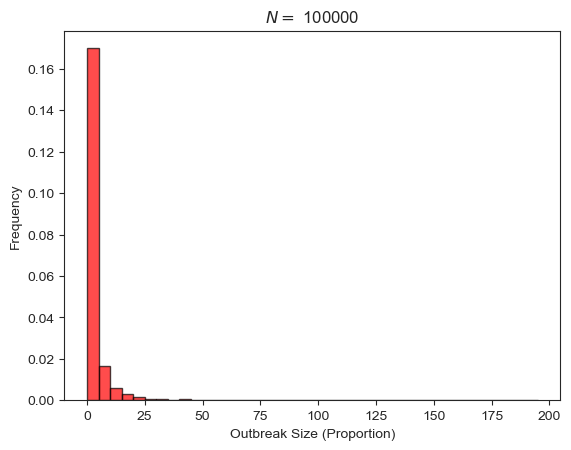

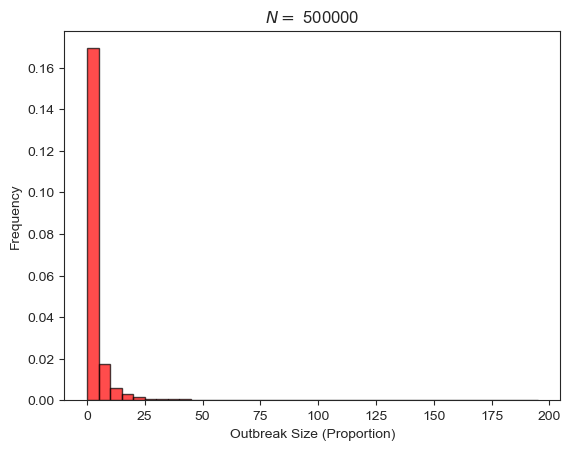

In [9]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    fsize_eps1.append(np.mean(df_cur))
    std_fsize_eps1.append(np.std(df_cur))
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,200,5)
    plt.hist(np.array(df_cur), bins = bins_vec, edgecolor = 'black', color = 'red', alpha = 0.7, density = True)
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.show()

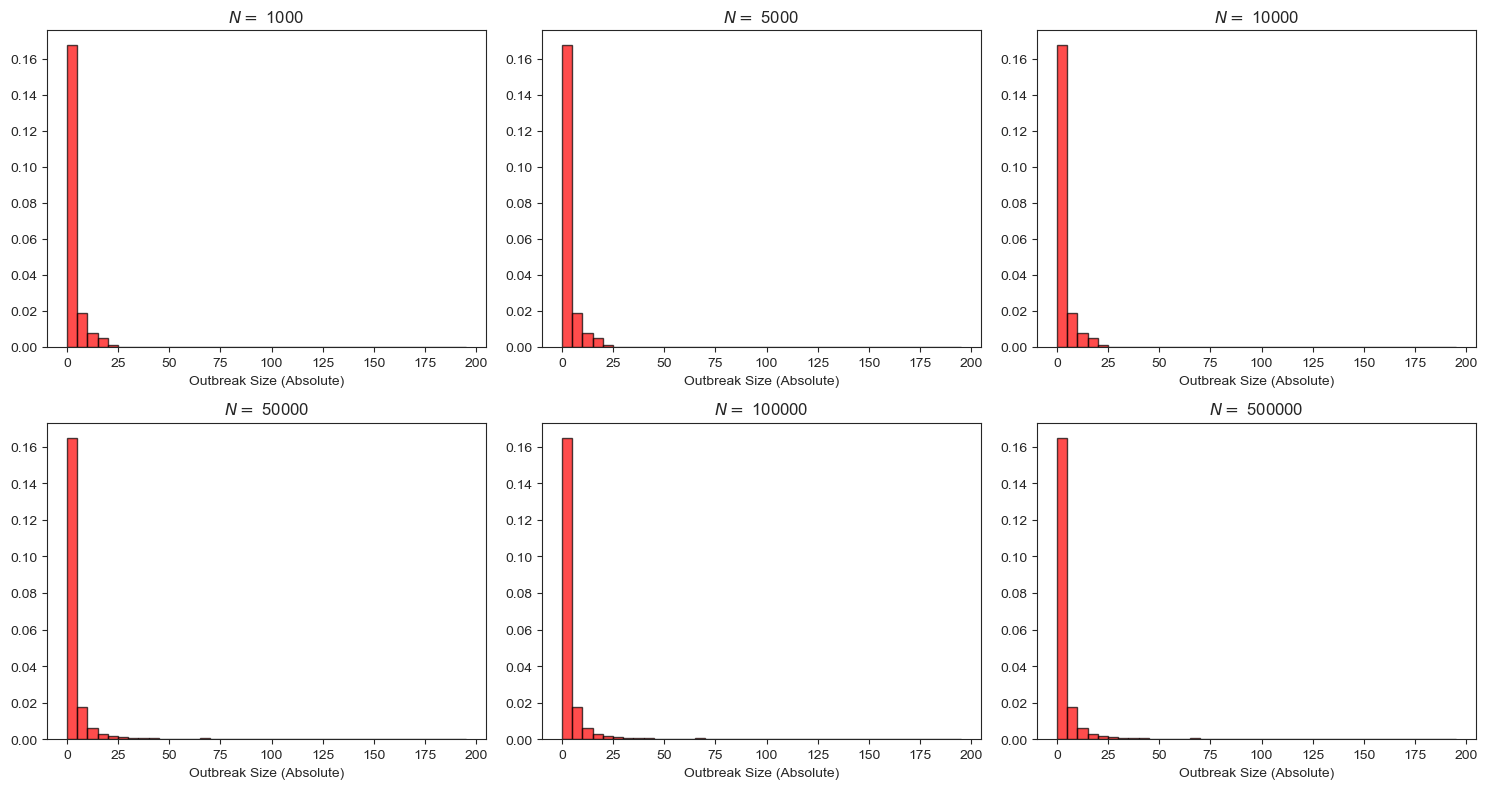

In [10]:
fig, axs = plt.subplots(2, 3, figsize = (15,8))
df = np.loadtxt(files[-1])
c = 0
for i in range(2):
    for j in range(3):
        df_cur = df[i]
        df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
        bins_vec = np.arange(0,200,5)
        axs[i,j].hist(np.array(df_cur), bins = bins_vec, edgecolor = 'black', color = 'red', alpha = 0.7, density = True)
        #axs[i,j].legend(fontsize = 8)
        axs[i,j].set_xlabel('Outbreak Size (Absolute)')
        axs[i,j].set_title(r'$N = $ '+str(N_vec[c]))
        c = c + 1
fig.tight_layout()
plt.show()

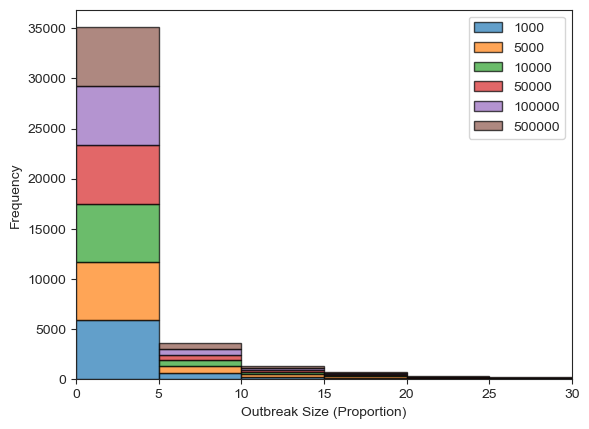

In [11]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
means_plot = []
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    means_plot.append(df_cur)
    
bins_vec = np.arange(0,200,5)
plt.hist(means_plot, stacked = True, bins = bins_vec, edgecolor = 'black', alpha = 0.7, label = N_vec)
plt.ylabel('Frequency')
plt.xlabel('Outbreak Size (Proportion)')
plt.xlim((0,30))
plt.legend()
plt.show()

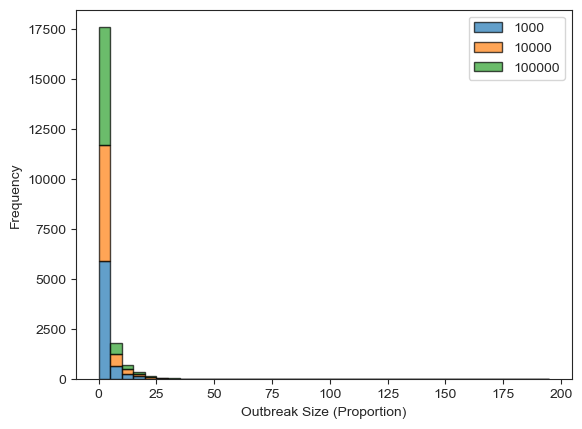

In [12]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,10000,100000]
df = np.loadtxt(files[-1])
df = df[[0,2,4]]
means_plot = []
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    means_plot.append(df_cur)
    
bins_vec = np.arange(0,200,5)
plt.hist(means_plot, stacked = True, bins = bins_vec, edgecolor = 'black', alpha = 0.7, label = N_vec)
plt.ylabel('Frequency')
plt.xlabel('Outbreak Size (Proportion)')
plt.legend()
plt.show()

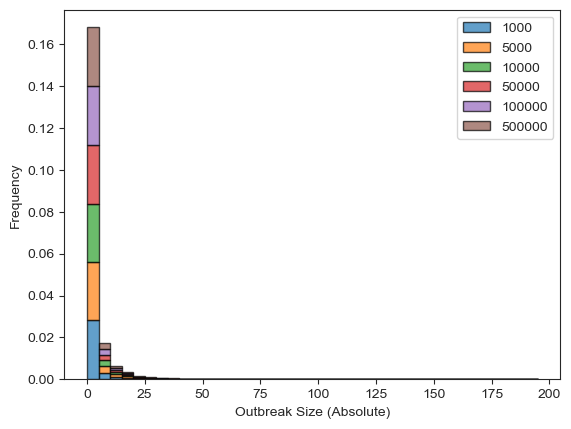

In [13]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
means_plot = []
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    means_plot.append(df_cur)
    
bins_vec = np.arange(0,200,5)
plt.hist(means_plot, stacked = True, bins = bins_vec, edgecolor = 'black', alpha = 0.7, density = True, label = N_vec)
plt.ylabel('Frequency')
plt.xlabel('Outbreak Size (Absolute)')
plt.legend()
plt.show()

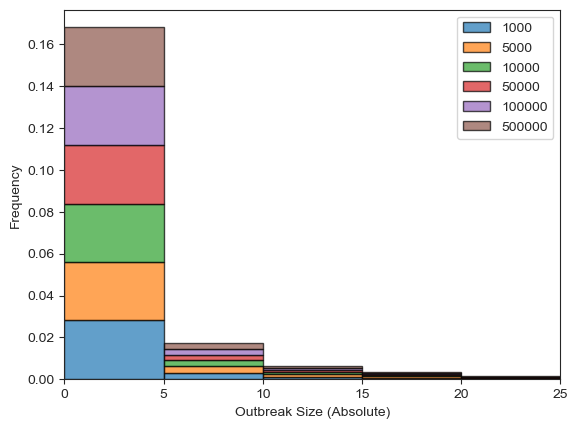

In [14]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
means_plot = []
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    means_plot.append(df_cur)
    
bins_vec = np.arange(0,200,5)
plt.hist(means_plot, stacked = True, bins = bins_vec, edgecolor = 'black', alpha = 0.7, density = True, label = N_vec)
plt.ylabel('Frequency')
plt.xlabel('Outbreak Size (Absolute)')
plt.xlim((0,25))
plt.legend()
plt.show()

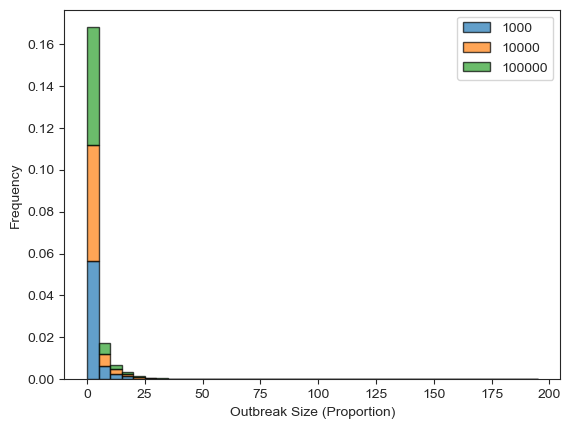

In [15]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,10000,100000]
df = np.loadtxt(files[-1])
df = df[[0,2,4]]
means_plot = []
for i in range(len(N_vec)):
    df_cur = df[i]
    df_cur = df_cur[df_cur <= 0.02*N_vec[i]]
    means_plot.append(df_cur)
    
bins_vec = np.arange(0,200,5)
plt.hist(means_plot, stacked = True, bins = bins_vec, edgecolor = 'black', alpha = 0.7, density = True, label = N_vec)
plt.ylabel('Frequency')
plt.xlabel('Outbreak Size (Proportion)')
plt.legend()
plt.show()

# Loading files of simulatios

In [16]:
files = ['measles/measles_-0.05/GTP_fsize_inf_2e-06_-0.05_500000.csv',
        'measles/measles_-0.03/GTP_fsize_inf_2e-06_-0.03_500000.csv',
        'measles/measles_-0.01/GTP_fsize_inf_2e-06_-0.01_500000.csv',
        'measles/measles_0/GTP_fsize_inf_2e-06_0_500000.csv',
        'measles/measles_0.01/GTP_fsize_inf_2e-06_0.01_500000.csv',
        'measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv',
        'measles/measles_0.05/GTP_fsize_inf_2e-06_0.05_500000.csv',
        'measles/measles_0.1/GTP_fsize_inf_2e-06_0.1_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
eps_vec = [-0.05,-0.03,-0.01,0,0.01,0.03,0.05,0.1]

# Different $\epsilon$ values separately, same $N$

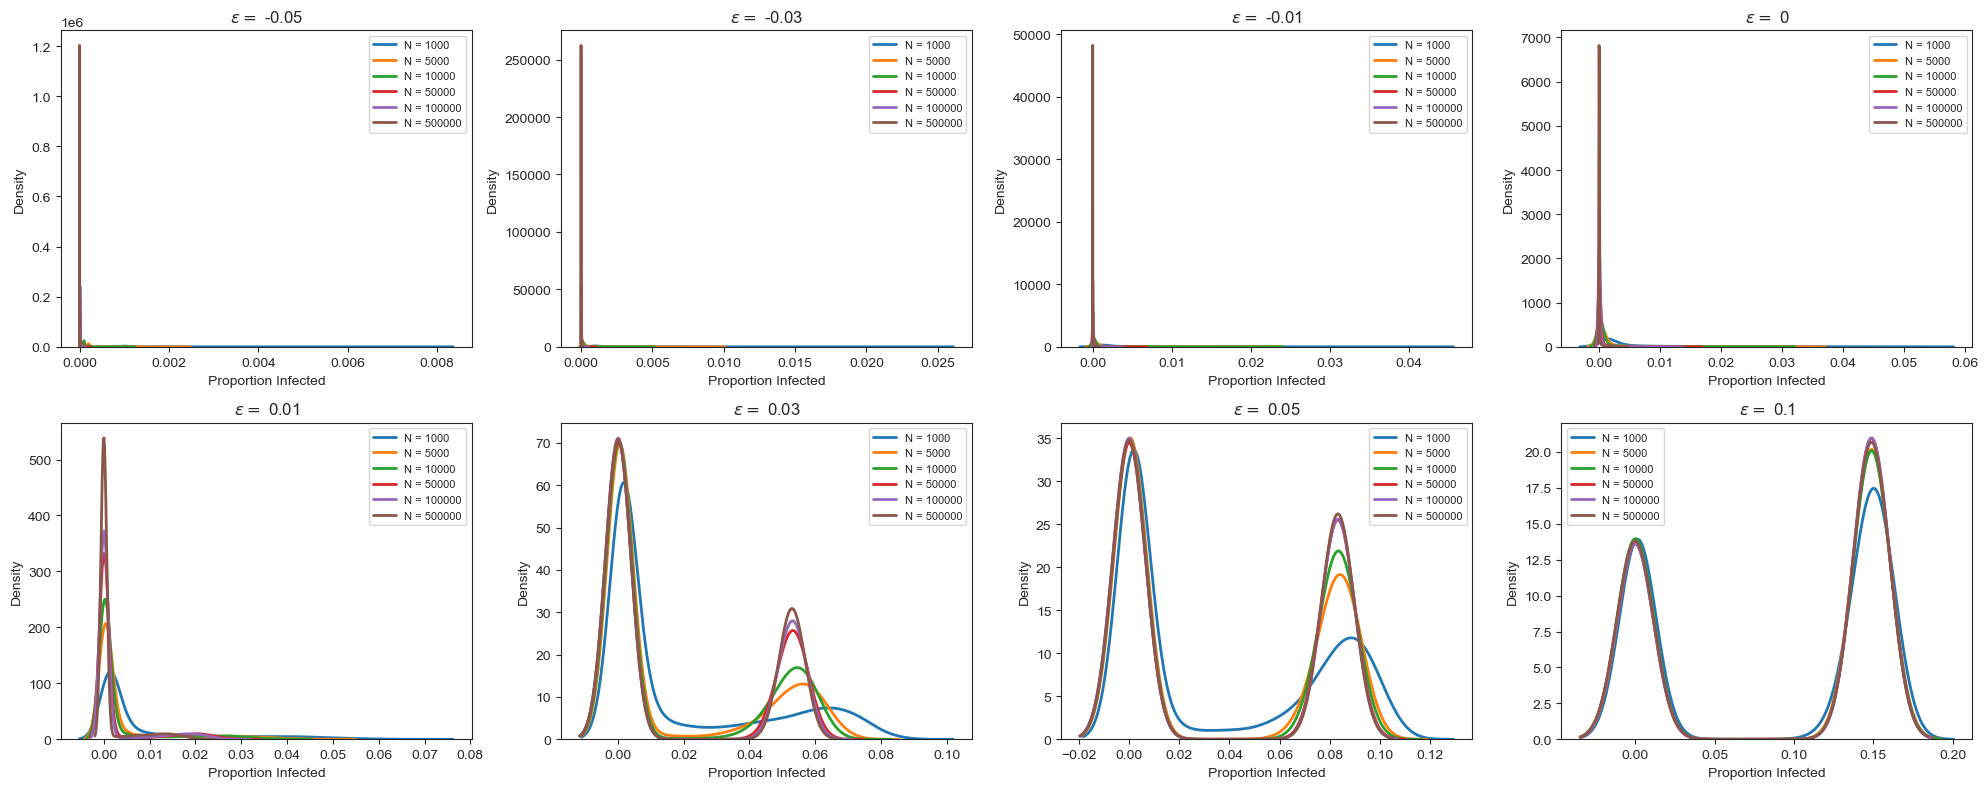

In [17]:
fig, axs = plt.subplots(2, 4, figsize = (20,8))
c = 0
for i in range(2):
    for j in range(4):
        df = np.loadtxt(files[c])
        for k in range(len(N_vec)):
            sns.kdeplot(np.array(df[k])/N_vec[k], linewidth = 2, label = 'N = '+str(N_vec[k]),ax=axs[i,j])
        axs[i,j].legend(fontsize = 8)
        axs[i,j].set_xlabel('Proportion Infected')
        axs[i,j].set_title(r'$\epsilon = $ '+str(eps_vec[c]))
        c = c + 1
fig.tight_layout()
plt.savefig('plot_different_eps.pdf')
plt.show()

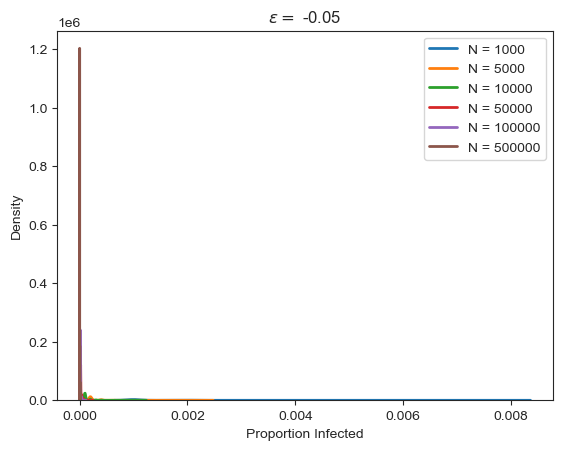

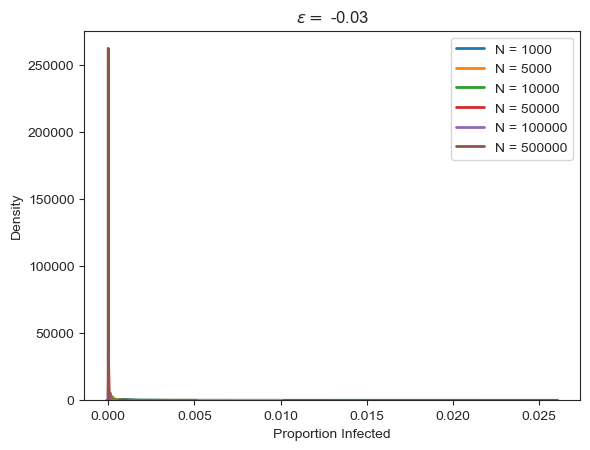

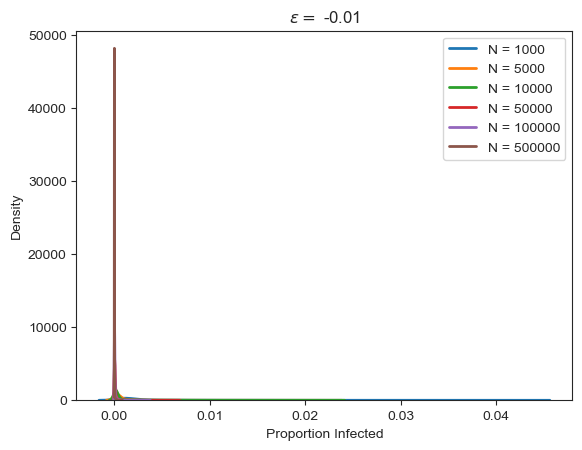

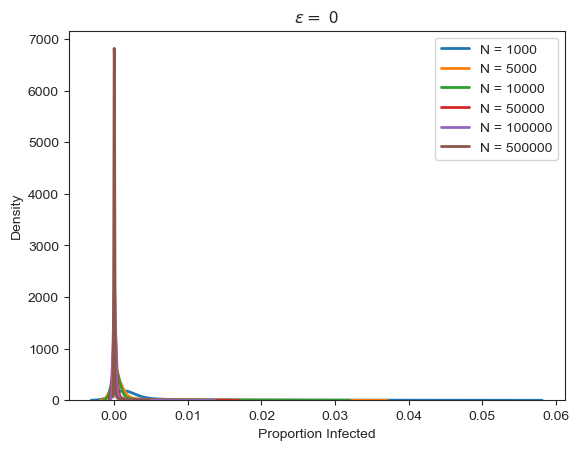

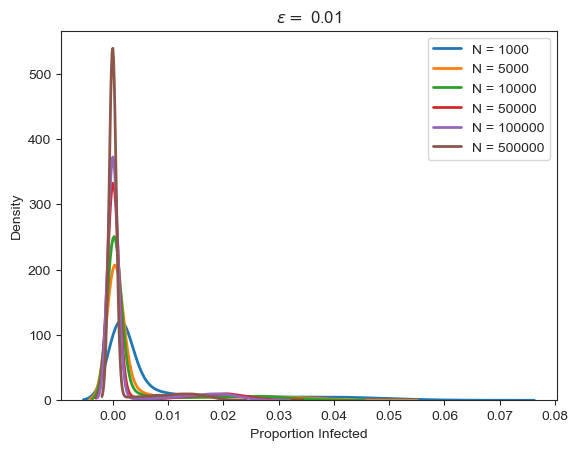

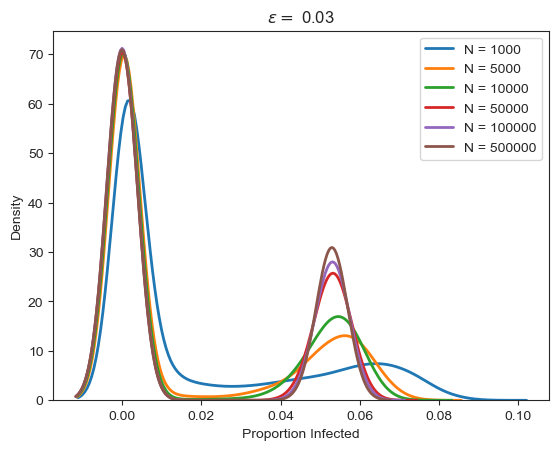

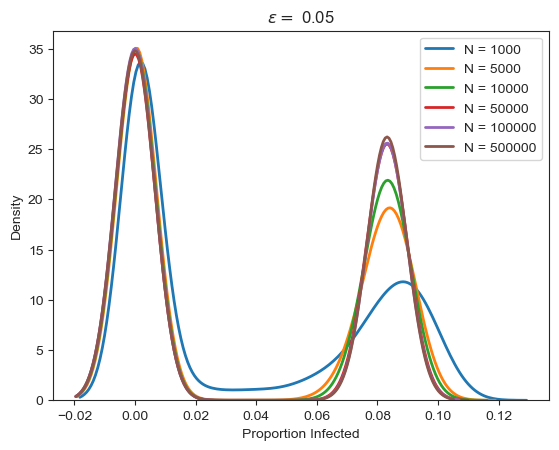

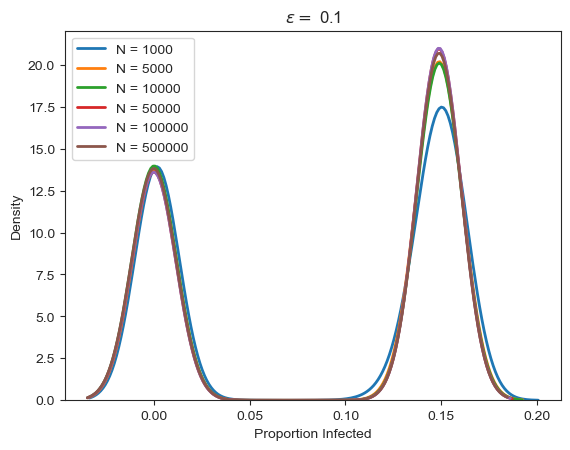

In [18]:
fsize_eps = []
std_fsize_eps = []
c = 0
for i in range(2):
    for j in range(4):
        df = np.loadtxt(files[c])
        for k in range(len(N_vec)):
            fsize_eps.append(np.mean(np.array(df[k])/N_vec[k]))
            std_fsize_eps.append(np.std(np.array(df[k])/N_vec[k]))
            sns.kdeplot(np.array(df[k])/N_vec[k], linewidth = 2, label = 'N = '+str(N_vec[k]))
        plt.legend()
        plt.xlabel('Proportion Infected')
        plt.title(r'$\epsilon = $ '+str(eps_vec[c]))
        c = c + 1
        plt.show()

# Plotting mean outbreak size as function of epsilon 

In [19]:
fsize_eps = np.array(fsize_eps)
fsize_eps = fsize_eps.reshape((8,6))
std_fsize_eps = np.array(std_fsize_eps)
std_fsize_eps = std_fsize_eps.reshape((8,6))

In [20]:
N_vec

[1000, 5000, 10000, 50000, 100000, 500000]

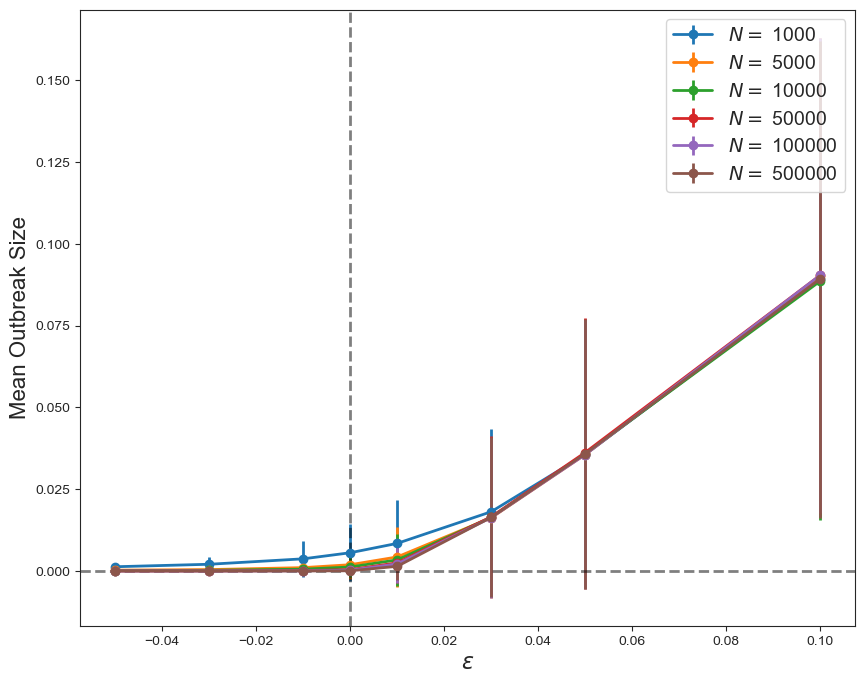

In [21]:
fig = plt.subplots(figsize = (10,8))
for i in range(6):
    plt.errorbar(eps_vec,fsize_eps.T[i,:], std_fsize_eps.T[i,:], label = r'$N = $ '+str(N_vec[i]), lw = 2, marker = 'o')
plt.legend(fontsize = 14)
plt.xlabel(r'$\epsilon$',fontsize = 16)
plt.ylabel('Mean Outbreak Size', fontsize = 16)
plt.axhline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.axvline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.show()

# Plotting for different $\epsilon$ as function of $N$

In [22]:
fsize_eps

array([[1.31110000e-03, 2.64880000e-04, 1.32600000e-04, 2.65380000e-05,
        1.32710000e-05, 2.65540000e-06],
       [2.06740000e-03, 4.41460000e-04, 2.22390000e-04, 4.48980000e-05,
        2.24760000e-05, 4.49860000e-06],
       [3.72900000e-03, 1.03798000e-03, 5.62570000e-04, 1.27584000e-04,
        6.53080000e-05, 1.33438000e-05],
       [5.58800000e-03, 1.92572000e-03, 1.23065000e-03, 4.26848000e-04,
        2.60384000e-04, 7.18328000e-05],
       [8.44920000e-03, 4.30004000e-03, 3.40298000e-03, 2.49962800e-03,
        2.17775300e-03, 1.42939660e-03],
       [1.81211000e-02, 1.62560600e-02, 1.64245200e-02, 1.65761900e-02,
        1.63231030e-02, 1.64094852e-02],
       [3.56024000e-02, 3.55749400e-02, 3.58166900e-02, 3.62116460e-02,
        3.55690840e-02, 3.58193176e-02],
       [8.93094000e-02, 9.01086800e-02, 8.85593200e-02, 9.03560220e-02,
        9.03719460e-02, 8.92331096e-02]])

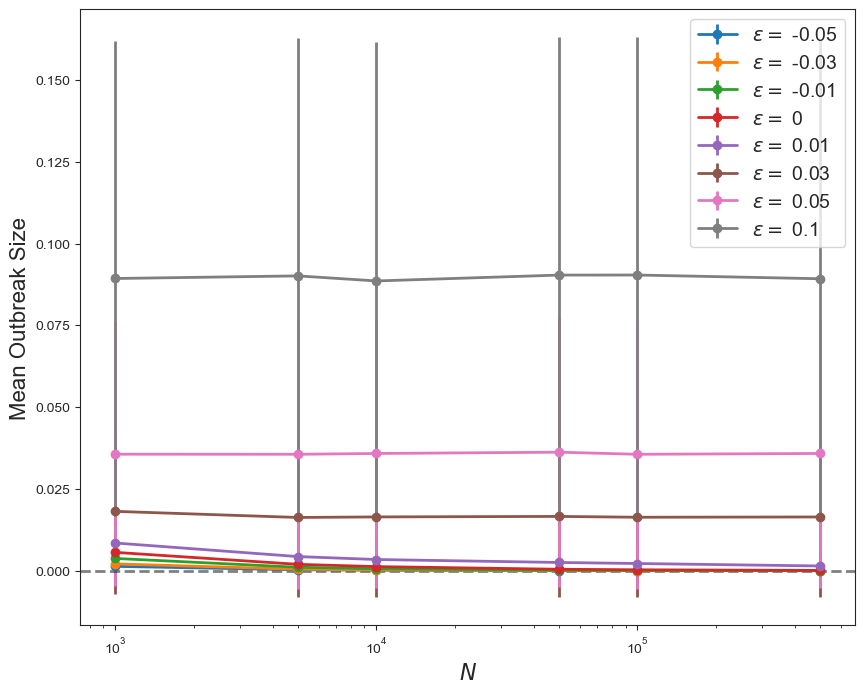

In [23]:
fig = plt.subplots(figsize = (10,8))
for i in range(8):
    plt.errorbar(N_vec, fsize_eps[i,:], std_fsize_eps[i,:], label = r'$\epsilon = $ '+str(eps_vec[i]), lw = 2, marker = 'o')
plt.legend(fontsize = 14)
plt.xlabel(r'$N$',fontsize = 16)
plt.ylabel('Mean Outbreak Size', fontsize = 16)
plt.xscale('log')
plt.axhline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.axvline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.show()

## Calculating probability of big and small outbreaks

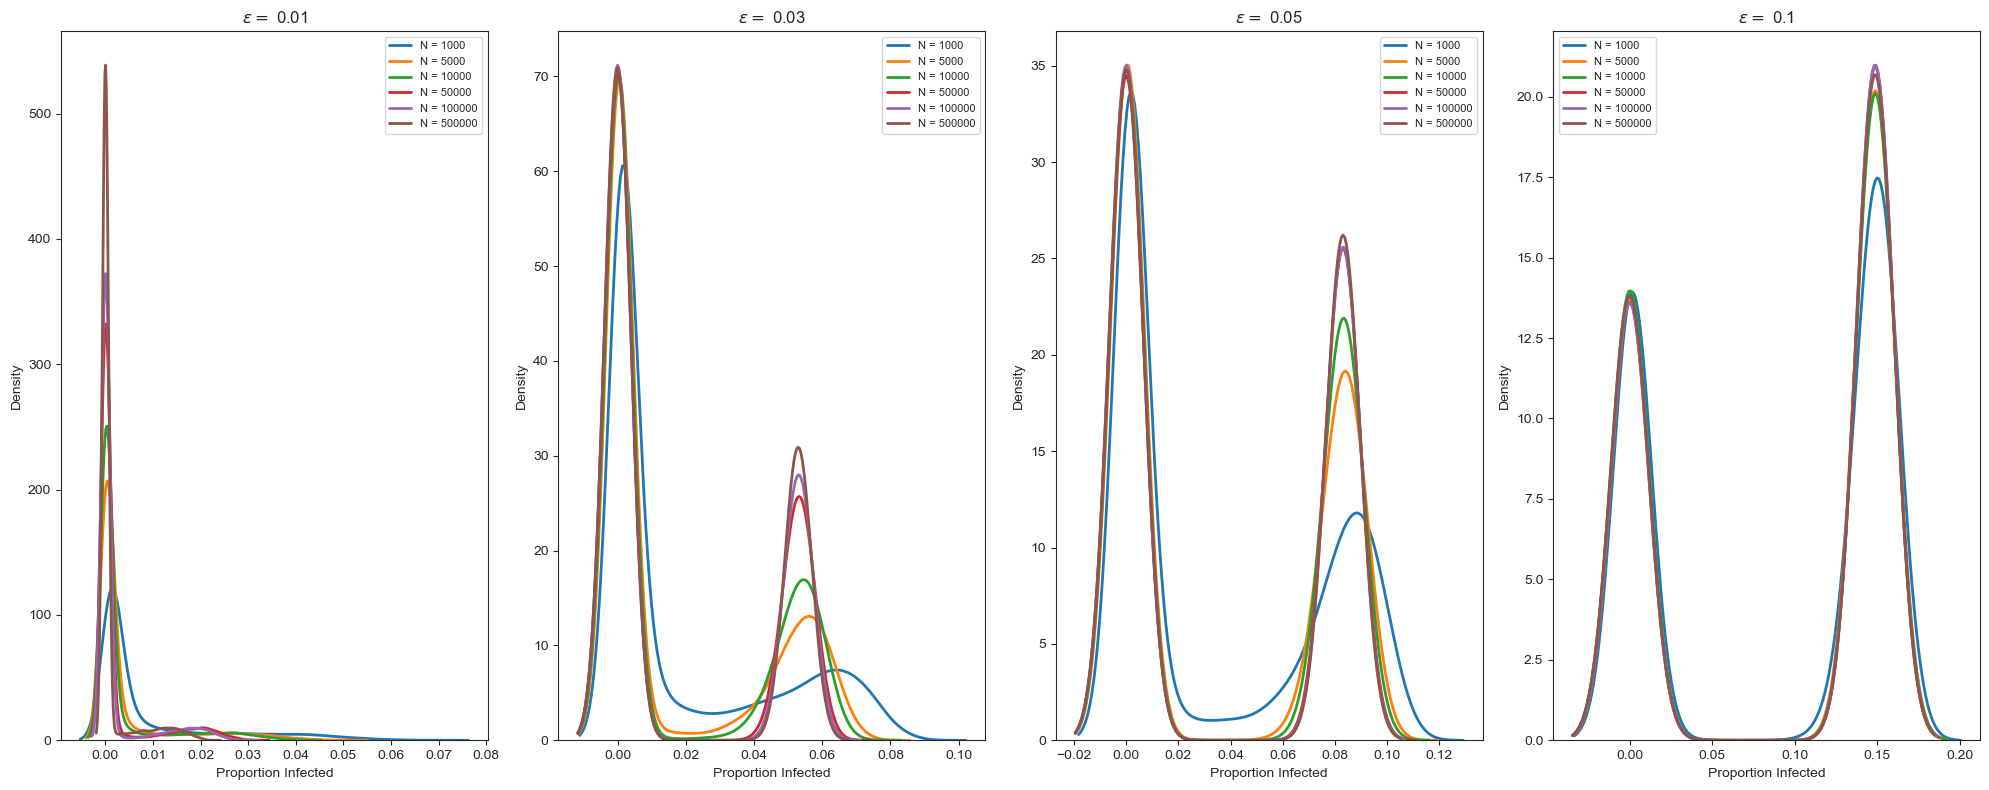

In [24]:
fig, axs = plt.subplots(1, 4, figsize = (20,8))
c = 4
for i in range(1):
    for j in range(4):
        df = np.loadtxt(files[c])
        for k in range(len(N_vec)):
            sns.kdeplot(np.array(df[k])/N_vec[k], linewidth = 2, label = 'N = '+str(N_vec[k]),ax=axs[j])
        axs[j].legend(fontsize = 8)
        axs[j].set_xlabel('Proportion Infected')
        axs[j].set_title(r'$\epsilon = $ '+str(eps_vec[c]))
        c = c + 1
fig.tight_layout()
plt.savefig('plot_different_eps_2.pdf')
plt.show()

0.7899999999999999 0.02487787344863937


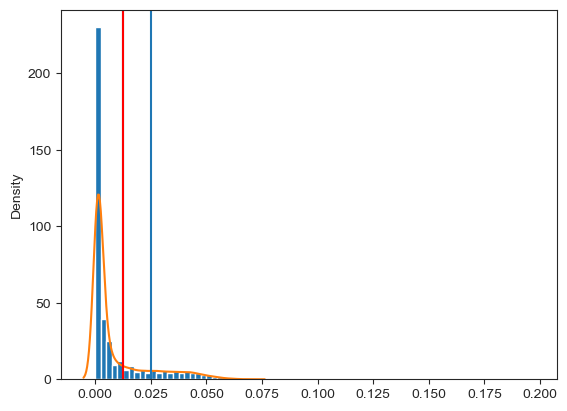

0.8578000000000001 0.020467449730325007


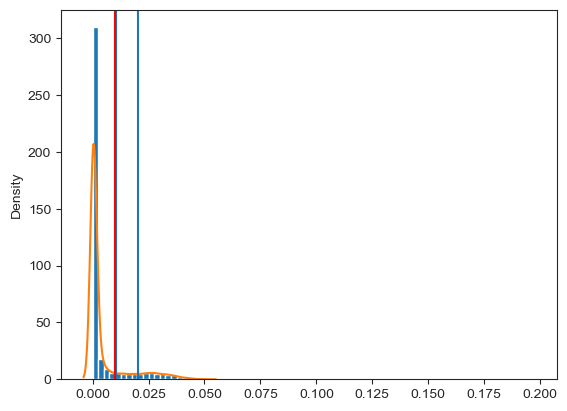

0.8754000000000001 0.019799718567496953


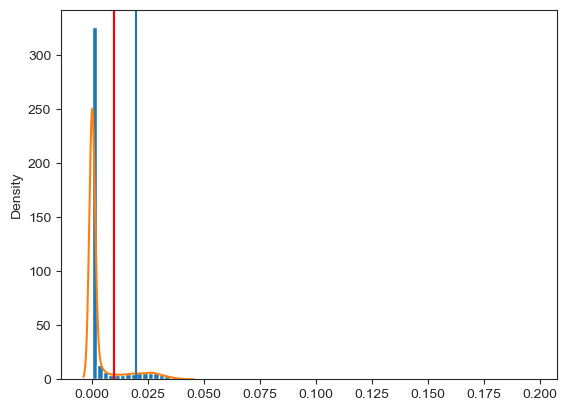

0.8807 0.019235828887072114


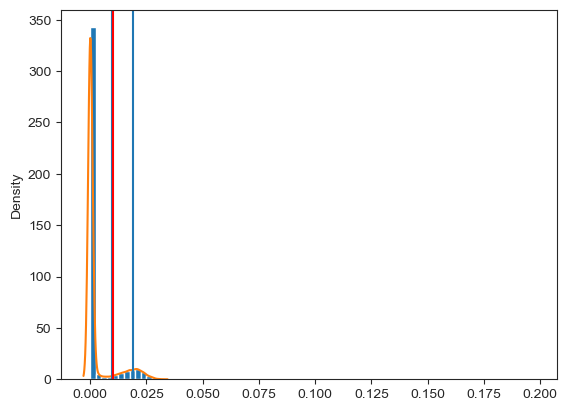

0.8884000000000002 0.01916324315678648


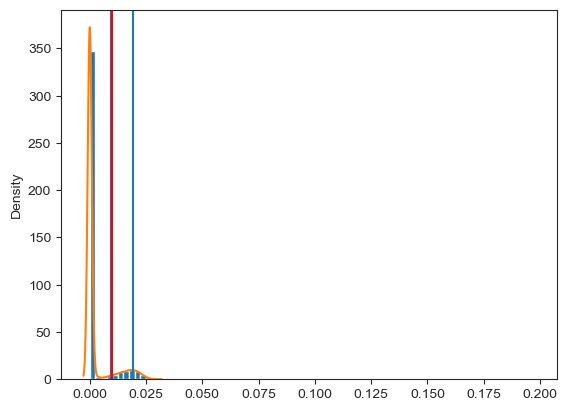

0.9236000000000001 0.019104815087484163


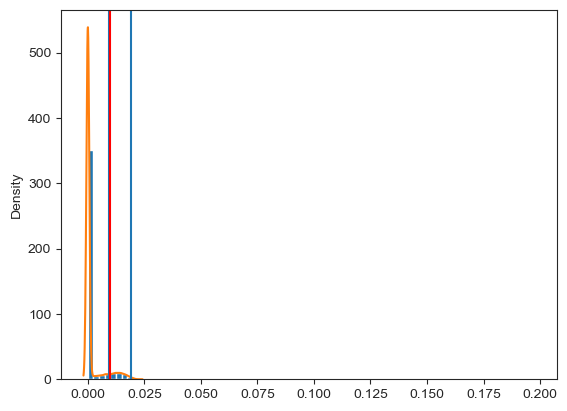

0.7275 0.05582488976349036


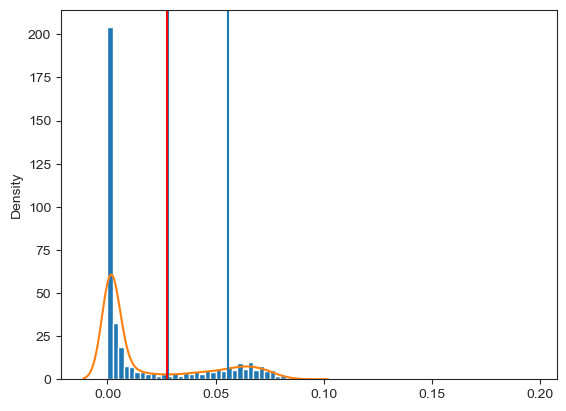

0.7091 0.05361403130522808


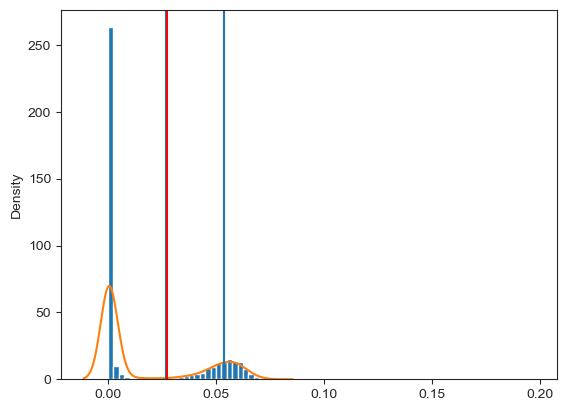

0.6964 0.05332816795457017


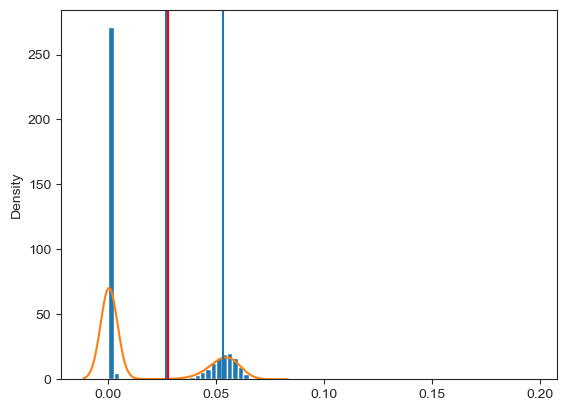

0.6882 0.05309781659012382


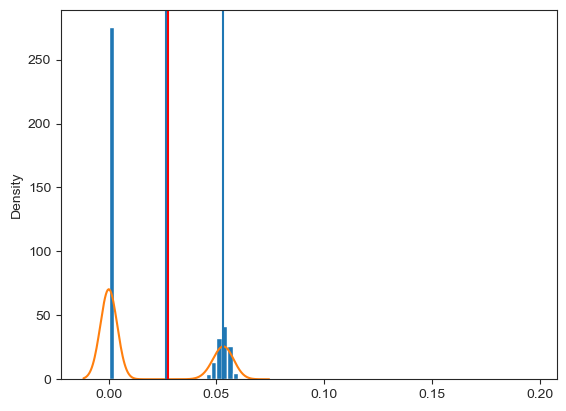

0.6927 0.053068916986911796


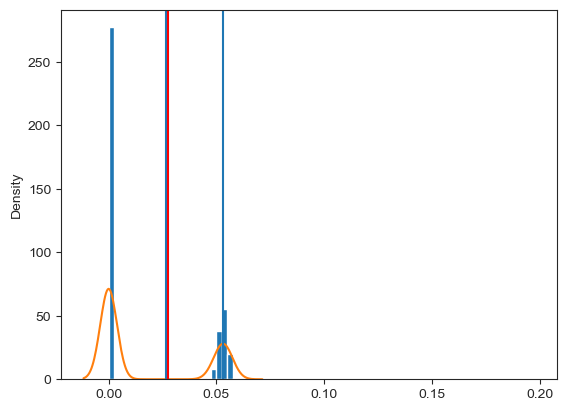

0.6901 0.05304578023547047


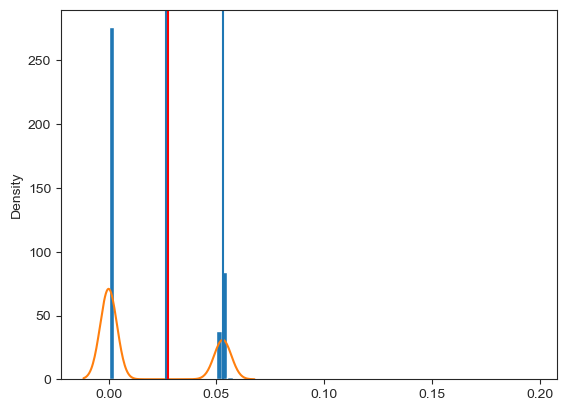

0.5998 0.08512979616099538


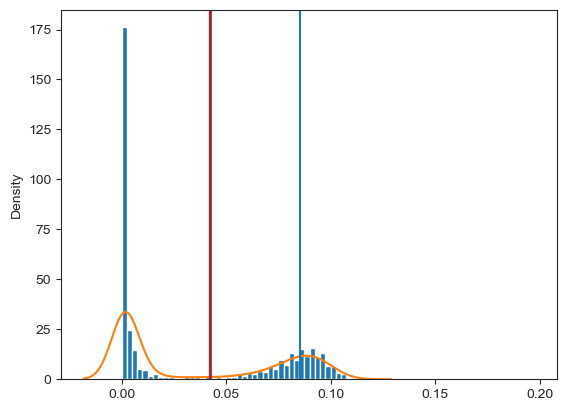

0.5758 0.08354912794718235


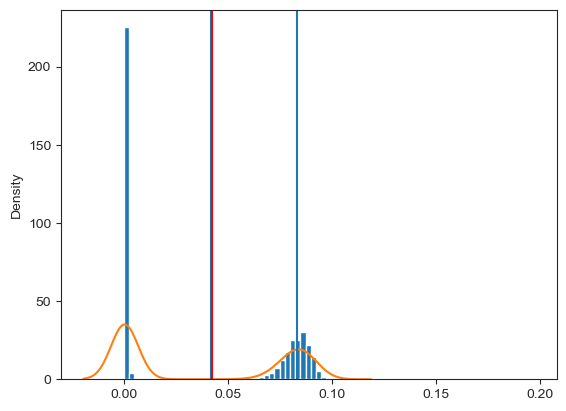

0.5706 0.08334892203581551


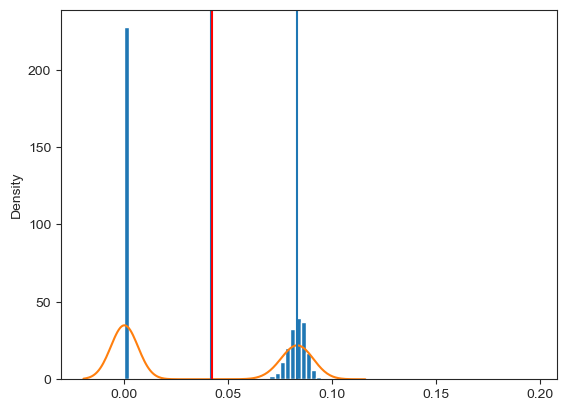

0.5648 0.08318832124990941


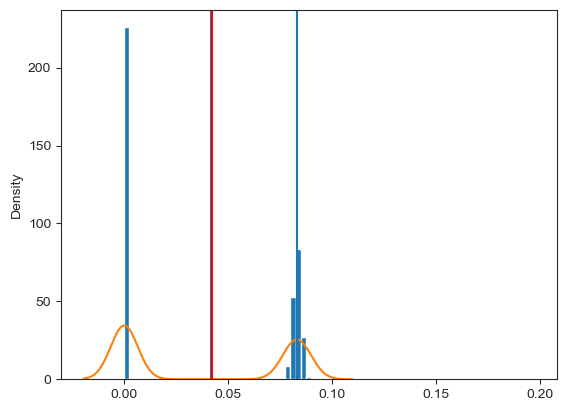

0.5725 0.08316821868878742


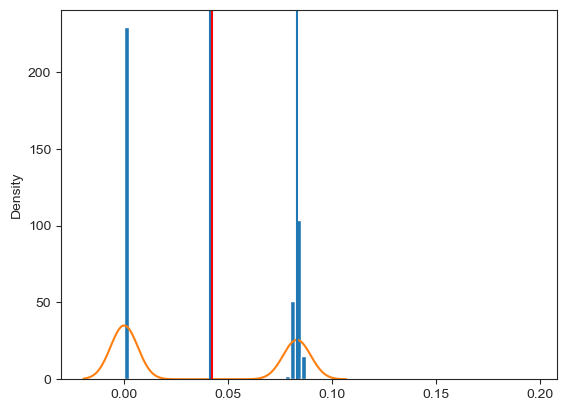

0.5693 0.08315213222838415


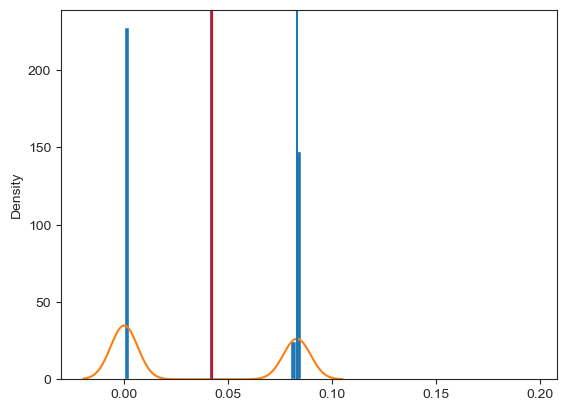

0.4064 0.15013590292020712


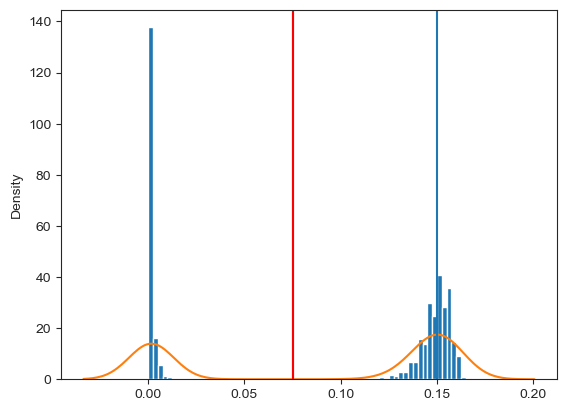

0.39540000000000003 0.1490472895683938


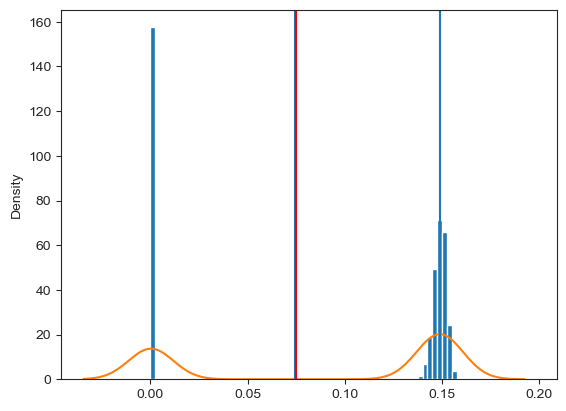

0.4057 0.148910758766701


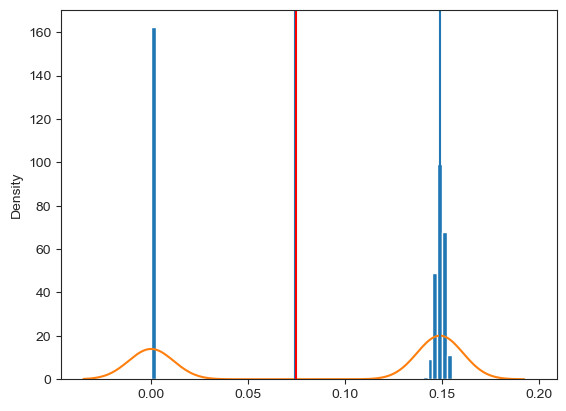

0.39280000000000004 0.14880146044478723


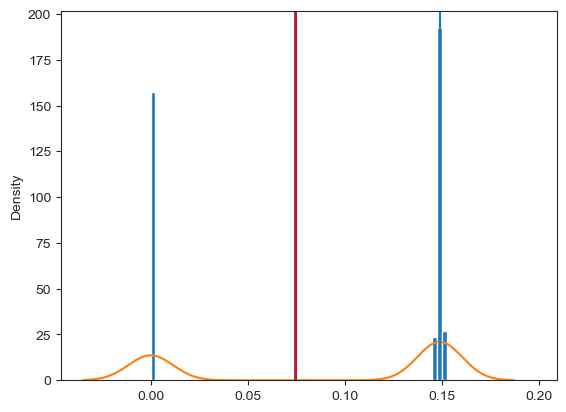

0.39270000000000005 0.14878779353696248


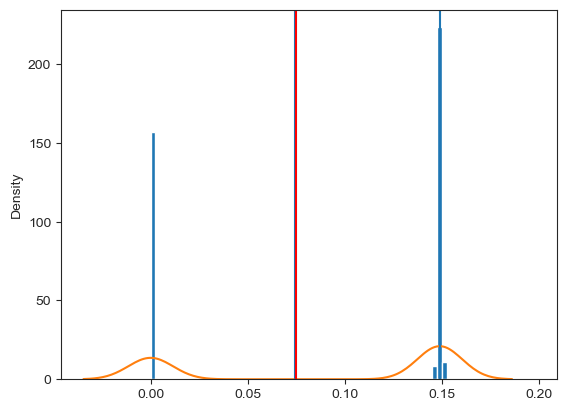

0.40030000000000004 0.14877685927084985


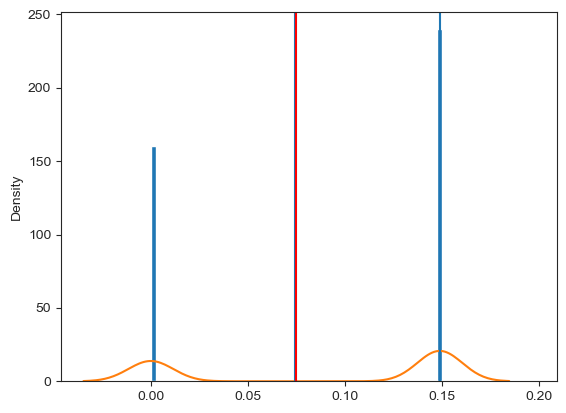

In [25]:
eps_res = np.array([0.01,0.03,0.05,0.1])
list_res = []
c = 4

for i in range(len(eps_res)):
    prov_list_res = []
    df = np.loadtxt(files[c])
    for j in range(len(N_vec)):
        a = plt.hist(df[j]/N_vec[j],bins = np.arange(0,0.2,0.0025), density = True)
        sns.kdeplot(df[j]/N_vec[j])
        plt.axvline(cases(3,0.2,eps_res[i],1/N_vec[j]))
        plt.axvline(cases(3,0.2,eps_res[i],1/N_vec[j])/2)
        plt.axvline(a[1][np.argmin(abs(a[1]-(cases(3,0.2,eps_res[i],1/N_vec[j])/2)))],color = 'red')
        nmin = np.argmin(abs(a[1]-(cases(3,0.2,eps_res[i],1/N_vec[j])/2)))
        prob = np.sum(0.0025*(a[0][0:nmin]))
        prov_list_res.append(prob)
        print(prob,cases(3,0.2,eps_res[i],1/N_vec[j]))
        plt.show() 
    list_res.append(prov_list_res)
    c = c + 1

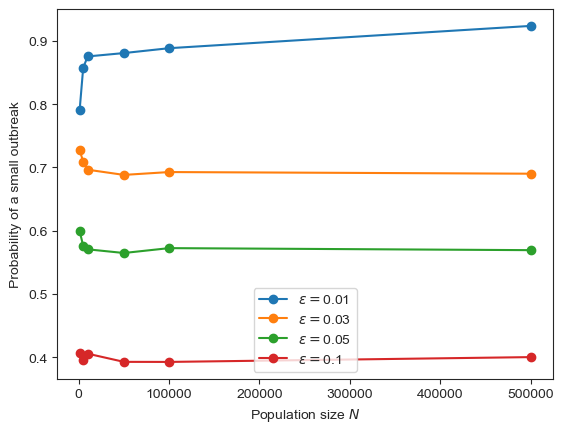

In [26]:
for i in range(len(eps_res)):
    plt.plot(N_vec,list_res[i], '-o',label = r'$\epsilon = $'+str(eps_res[i]))
plt.xlabel(r'Population size $N$')
plt.ylabel('Probability of a small outbreak')
plt.legend()
plt.show()

In [27]:
res_eps = np.array(list_res).transpose()

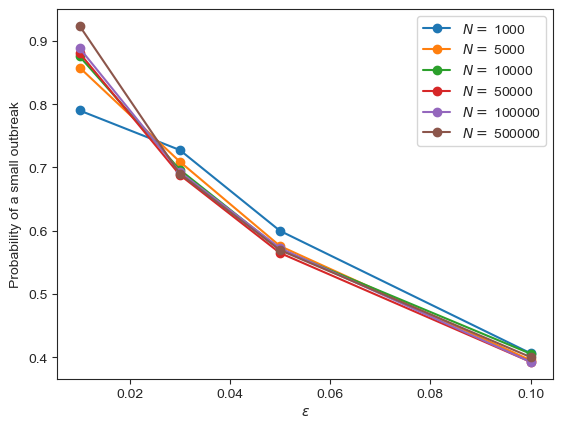

In [28]:
for i in range(len(N_vec)):
    plt.plot(eps_res,res_eps[i,:], '-o', label = r'$N =$ '+str(N_vec[i]))
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probability of a small outbreak')
plt.legend()
plt.show()

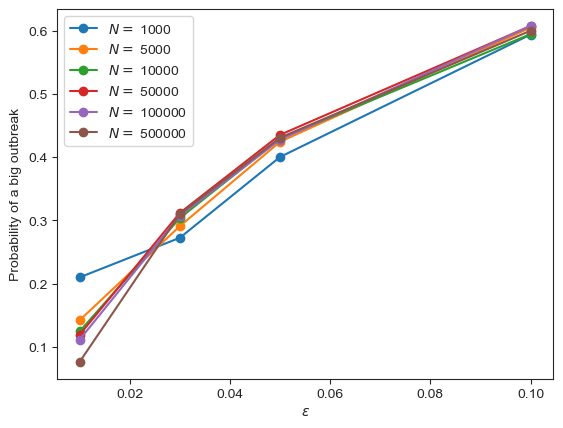

In [29]:
for i in range(len(N_vec)):
    plt.plot(eps_res,1 - res_eps[i,:], '-o', label = r'$N =$ '+str(N_vec[i]))
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probability of a big outbreak')
plt.legend()
plt.show()

###  Over the HIT threshold

0.6805 0.005441705013668889


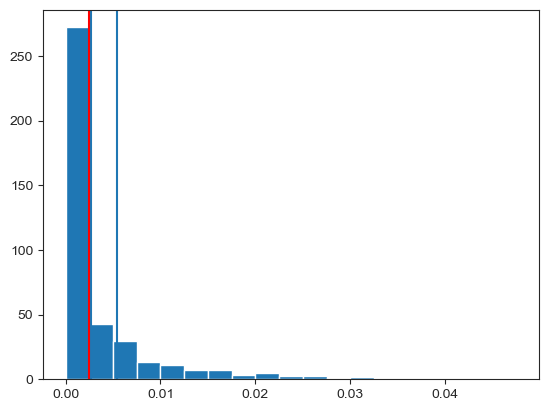

0.0 0.0012656795043323843


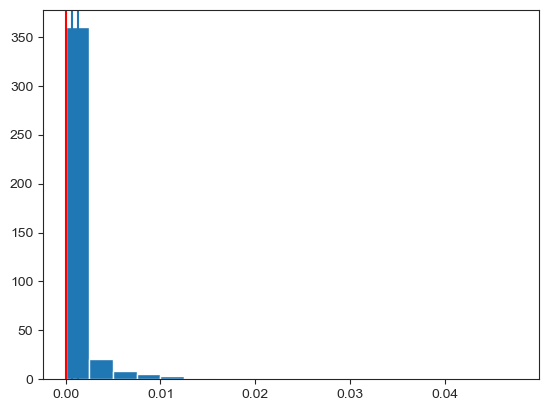

0.0 0.0006488327522331897


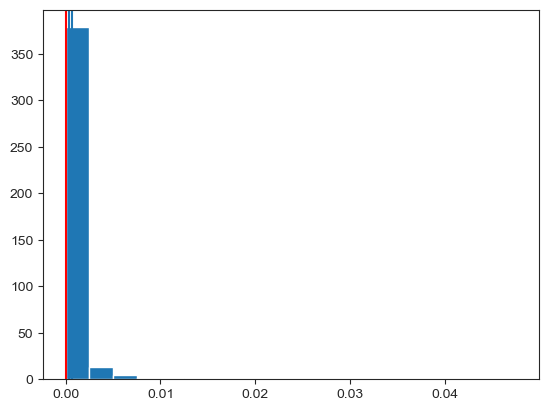

0.0 0.00013258671085093117


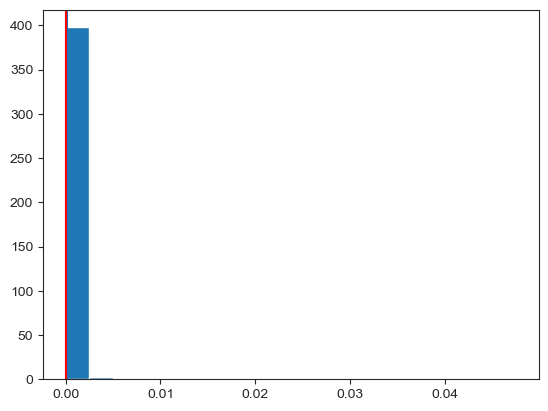

0.0 6.647890269218711e-05


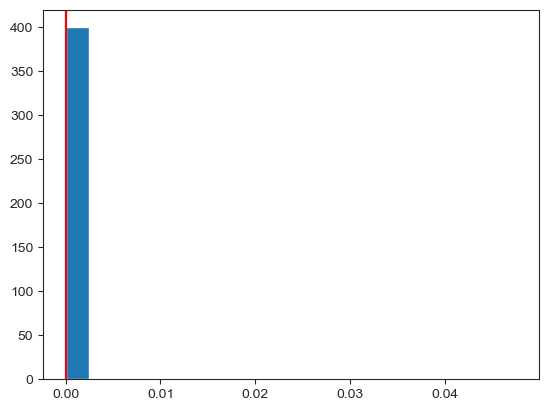

0.0 1.3325786830886699e-05


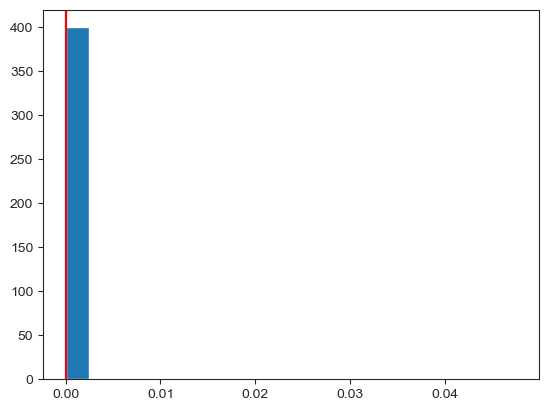

0.7264075335604088 0.011890185735412673


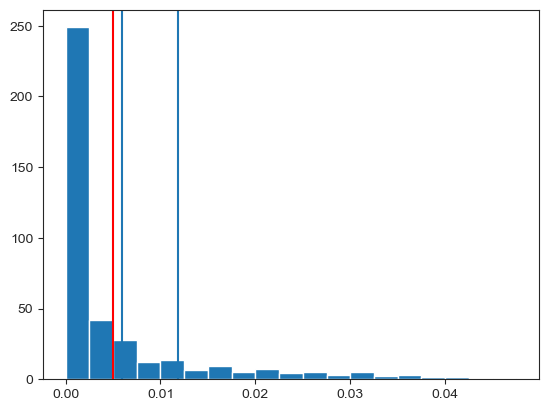

0.8392000000000001 0.005231514055622351


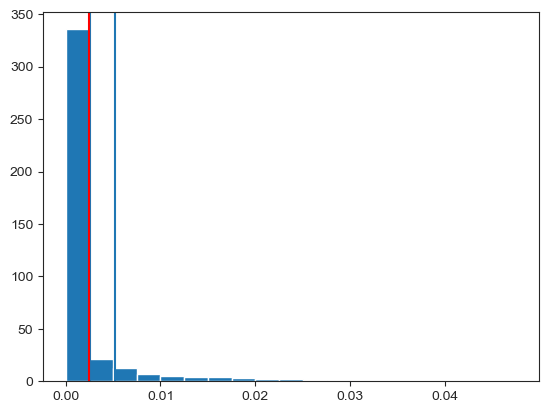

0.8853 0.0036851235700652812


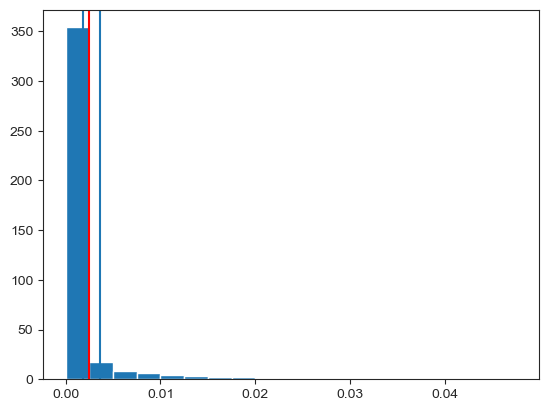

0.0 0.0016396871340991586


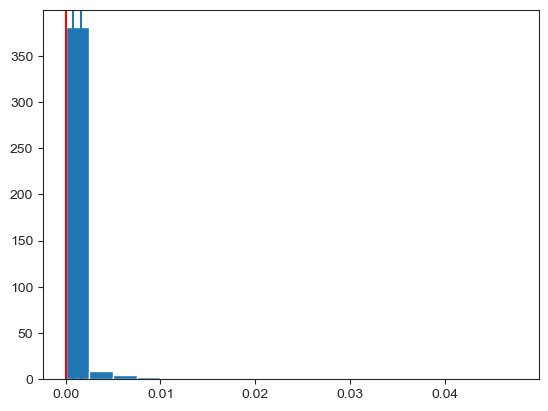

0.0 0.0011580435164634103


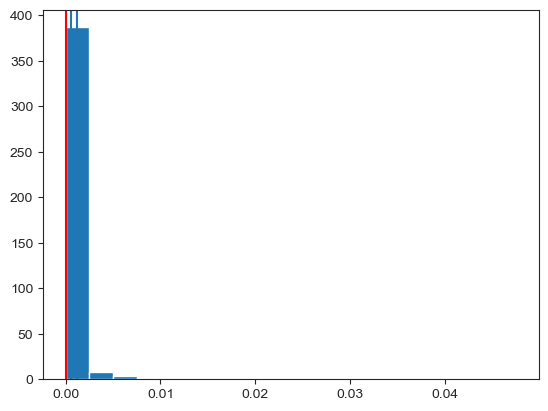

0.0 0.0005170653077139672


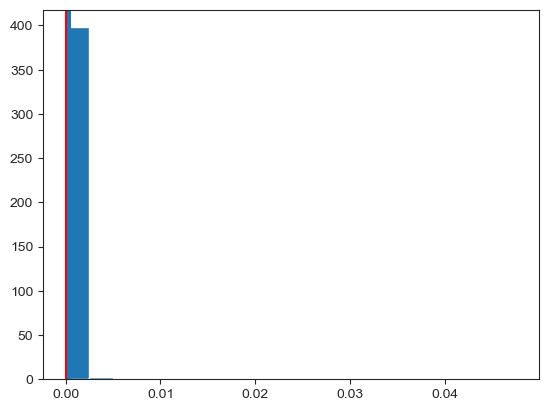

In [32]:
eps_res = np.array([-0.01,0.0])
list_res = []
c = 2

for i in range(len(eps_res)):
    prov_list_res = []
    df = np.loadtxt(files[c])
    for j in range(len(N_vec)):
        a = plt.hist(df[j]/N_vec[j],bins = np.arange(0,0.05,0.0025), density = True)
        #sns.kdeplot(df[j]/N_vec[j])
        plt.axvline(cases(3,0.2,eps_res[i],1/N_vec[j]))
        plt.axvline(cases(3,0.2,eps_res[i],1/N_vec[j])/2)
        plt.axvline(a[1][np.argmin(abs(a[1]-(cases(3,0.2,eps_res[i],1/N_vec[j])/2)))],color = 'red')
        nmin = np.argmin(abs(a[1]-(cases(3,0.2,eps_res[i],1/N_vec[j])/2)))
        prob = np.sum(0.0025*(a[0][0:nmin]))
        prov_list_res.append(prob)
        print(prob,cases(3,0.2,eps_res[i],1/N_vec[j]))
        plt.show() 
    list_res.append(prov_list_res)
    c = c + 1